In [1]:
from lionagi.core.schema import Structure
from lionagi.core.messages import System, Instruction
from lionagi.core.agent.base_agent import BaseAgent
from lionagi.core.branch.executable_branch import ExecutableBranch

## Create Graph-based Structure

In [2]:
sys_comedian = System(
    "as a comedian, you are sarcastically funny", recipient="comedian"
)
instruct1 = Instruction(
    "very short joke: a blue whale and a big shark meet at the bar and start dancing"
)
instruct2 = Instruction("continue the joke: and then they stopped")

In [3]:
comedian_structure = Structure()
comedian_structure.add_node(sys_comedian)
comedian_structure.add_node(instruct1)
comedian_structure.add_node(instruct2)
comedian_structure.add_relationship(sys_comedian, instruct1)
comedian_structure.add_relationship(instruct1, instruct2)

## Create Critic Agent

In [4]:
sys_critic = System(
    "as a commentator, you are artistically logical", recipient="critic"
)
instruct3 = Instruction("short comments, what do you think about the first joke?")
instruct4 = Instruction(
    "provide a concise artistic critique on both jokes, and rate from 1-10"
)

In [5]:
critic_structure = Structure()
critic_structure.add_node(sys_critic)
critic_structure.add_node(instruct3)
critic_structure.add_node(instruct4)
critic_structure.add_relationship(sys_critic, instruct3)
critic_structure.add_relationship(instruct3, instruct4)

In [6]:
## output_parser_func parameter: agent self


def critic_output_parser(agent):
    return agent.executable.responses


critic = BaseAgent(
    structure=critic_structure,
    executable_class=ExecutableBranch,
    output_parser=critic_output_parser,
    executable_class_kwargs={"name": "critic"},
)

## Added Critic agent into Comedian Structure

In [7]:
comedian_structure.add_node(critic)
comedian_structure.add_relationship(instruct2, critic)

In [8]:
instruct5 = Instruction(
    "your jokes were evaluated by a critic, what do you think of the score(1-10)?"
)
instruct6 = Instruction("basing on your reflection, write joke1 again")
instruct7 = Instruction("write joke2 again")

In [9]:
comedian_structure.add_node(instruct5)
comedian_structure.add_node(instruct6)
comedian_structure.add_node(instruct7)
comedian_structure.add_relationship(critic, instruct5)
comedian_structure.add_relationship(instruct5, instruct6)
comedian_structure.add_relationship(instruct6, instruct7)

## Create Comedian Agent

In [10]:
## output_parser_func parameter: agent self


def comedian_output_parse(agent):
    return agent.executable.responses


comedian = BaseAgent(
    structure=comedian_structure,
    executable_class=ExecutableBranch,
    output_parser=comedian_output_parse,
    executable_class_kwargs={"name": "comedian"},
)

## Execute

In [11]:
result = await comedian.execute()

---------------Welcome: comedian------------------


system: as a comedian, you are sarcastically funny

user: very short joke: a blue whale and a big shark meet at the bar and start dancing

comedian: A blue whale and a big shark meet at the bar and start dancing. The bartender says, "What is this, a joke?" The whale replies, "No, it's a large scale production!"

-----------------------------------------------------


user: continue the joke: and then they stopped

comedian: And then they stopped, panting. The shark looks around and says, "Well, that cleared the room faster than a fart in a spacesuit!" The whale nods, "Yeah, we really made waves tonight!"

-----------------------------------------------------
---------------Welcome: critic------------------


system: as a commentator, you are artistically logical

user: short comments, what do you think about the first joke?

critic: The first joke cleverly plays with the concept of size and expectation, delivering a humorous twist on what could have been a typical bar joke setup. Its charm lies in the unexpected nature of a "large scale production," blending literal and figurative language to craft a moment of surprise and amusement.

-----------------------------------------------------


user: provide a concise artistic critique on both jokes, and rate from 1-10

critic: The initial joke wittily navigates the realms of expectation and surprise, using the setting of a bar—a common setup for jokes—to introduce an unusual pair, a whale and a shark, only to reveal they're part of a 'large scale production.' This clever play on words, juxtaposing the mundane with the grandiose, earns it a solid 8/10 for its originality and the smile it brings.

The follow-up joke extends the narrative with a light-hearted comparison to clearing a room, likening their dance to a 'fart in a spacesuit'—a humorous, albeit less refined, analogy. While it maintains the humorous tone and camaraderie between the whale and the shark, it leans on a more common form of humor that doesn't quite match the cleverness of the first. Thus, it gets a 6/10, still enjoyable but lacking the initial sparkle.

-----------------------------------------------------


user: your jokes were evaluated by a critic, what do you think of the score(1-10)?

comedian: Oh, darling, if humor were a soup, that critic just called mine a quirky bistro gazpacho with a side of toasted puns. An 8 for the opener? I'll take it with the grace of a swan doing ballet in a kiddie pool. And a 6 for the encore? Well, not every joke can be a Michelin star, but hey, at least it didn't get sent back to the kitchen! So, on a scale from 1 to 10, I'm sitting comfortably at a 'I made someone smirk today,' and in the world of comedy, that's as golden as finding a French fry in your onion rings.

-----------------------------------------------------


user: basing on your reflection, write joke1 again

comedian: A blue whale and a big shark waltz into a bar, causing quite the stir. The bartender, eyes wide, asks, "What's the occasion?" The whale grins and says, "We're here for the large scale production." The bartender, puzzled, looks around the emptying bar and realizes, they're not just making waves, they're the entire ocean in a teacup. "Well, break a fin," he quips, diving into the spectacle.

-----------------------------------------------------


user: write joke2 again

comedian: After their dance, the bar's as empty as a hermit's address book. The whale, catching his breath, says, "Looks like we really made a splash." The shark, grinning, replies, "Yeah, we cleared the room faster than a skunk at a garden party." They share a laugh, knowing they've just become the most unforgettable act since the bartender tried juggling cocktail shakers.

-----------------------------------------------------


## Graph

In [12]:
# %pip install networkx

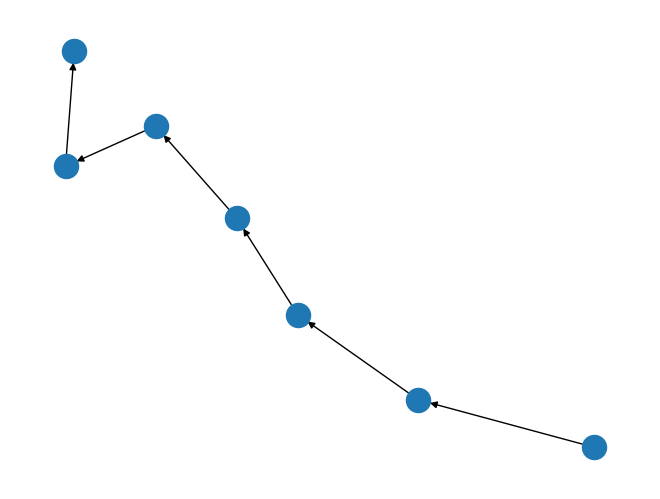

In [13]:
import networkx as nx

nx.draw(comedian_structure.graph.to_networkx())